# Stanford CME 241 (Winter 2025) - Assignment 1

**Due: Tuesday, January 21 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ardbeg-10/RL-book/tree/master/assignments

*Group members (replace below names with people in your group):* 
- James Liu
- Yuteng Zhuang

## Imports

In [3]:
from matplotlib import pyplot as plt
from dataclasses import dataclass
from typing import Mapping, Dict
from rl.distribution import Categorical, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess, NonTerminal, Terminal
from rl.markov_process import State
import numpy as np

## Question 1: Snakes and Ladders (Led by Yuteng & James)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image below for the locations of the snakes and ladders.

![Snakes and Laddders](./Figures/snakesAndLadders.png)

---

### Part (A) Answer

The state space is $S = \{0, 1, 2, 3, ..., 100\}$. The absorbing state is 100, and the initial state is 0.

### Part (B) Answer

Suppose $s_t$ is a non-terminal state, that is $s_t \in \{0, 1,2,3,...,99\}$; $i$ represents the number rolled from the dice, that is $i \in \{1,2,3,4,5,6\}$; $s' = s_t + i$.  
Also. ladder() and snake() are two functions that move input state to corresponding state.  
$$
s'' =
\begin{cases}
100 & \text{if } s' \geq 100 \text{ (already reached the terminal state)}, \\
\text{ladder}(s') & \text{if } s' \text{ is bottom of a ladder}, \\
\text{snake}(s') & \text{if } s' \text{ is head of a snake}, \\
s' & \text{otherwise}.
\end{cases}
$$  
The transision probability is
$$
P(s_{t+1} = x | s_t = s) = 
\begin{cases}
0 & \text{if } x \neq \text { any value of s''}\\
\frac {a} {6} & \text { otherwise, where a represents the number of time x appears in s''}
\end{cases}
$$


### Part (C) Answer

Transition Map
--------------
From State NonTerminal(state=SnakeAndLadderState(state=0)):
  To State NonTerminal(state=SnakeAndLadderState(state=38)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=2)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=3)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=14)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=5)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=6)) with Probability 0.167
From State NonTerminal(state=SnakeAndLadderState(state=1)):
  To State NonTerminal(state=SnakeAndLadderState(state=2)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=3)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=14)) with Probability 0.167
  To State NonTerminal(state=SnakeAndLadderState(state=5)) with Probability 0.167
  To State NonTerminal(stat

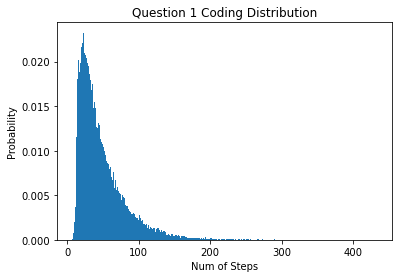

In [4]:
@dataclass(frozen=True)
class SnakeAndLadderState:
    state: int  

class SnakeAndLadderMPFinite(FiniteMarkovProcess[SnakeAndLadderState]):

    def __init__(self):
        self.board_size: int = 101
        self.snakes_ladders: Dict[int, int] =  {
            1: 38, 4: 14, 8: 10, 21: 42, 28: 76, 36: 6, 32: 10,
            48: 26, 50: 67, 62: 18, 71: 92, 88: 24,
            95: 56, 97: 78
        }
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[NonTerminal[SnakeAndLadderState], FiniteDistribution[State[SnakeAndLadderState]]]:
        transition_map: Dict[NonTerminal[SnakeAndLadderState], Categorical[State[SnakeAndLadderState]]] = {}
        
        for pos in range(0, self.board_size):
            current_state = NonTerminal(SnakeAndLadderState(pos))
            transitions: Dict[State[SnakeAndLadderState], float] = {}
            
            for dice_roll in range(1, 7): 
                next_pos = pos + dice_roll
                if next_pos >= self.board_size:
                    next_pos = self.board_size  
                
                next_pos = self.snakes_ladders.get(next_pos, next_pos)
                
                if next_pos == self.board_size:
                    next_state = Terminal(SnakeAndLadderState(next_pos))
                else:
                    next_state = NonTerminal(SnakeAndLadderState(next_pos))
                
                transitions[next_state] = transitions.get(next_state, 0) + (1 / 6)
            
            transition_map[current_state] = Categorical(transitions)
        
        return transition_map

sl_mp = SnakeAndLadderMPFinite()

print("Transition Map")
print("--------------")
print(sl_mp)

initial_distribution = Categorical({NonTerminal(state=NonTerminal(state=SnakeAndLadderState(state=0))) : 1.0})  
sample_traces = sl_mp.traces(initial_distribution)

finish_steps = []
for trace in sample_traces:
    steps = 0
    for state in trace:
        steps += 1
        if isinstance(state, Terminal):
            finish_steps.append(steps)
            break
    if len(finish_steps) >= 50000:  
        break
        
plt.hist(finish_steps, bins=range(min(finish_steps), max(finish_steps) + 1), density=True)
plt.xlabel('Num of Steps')
plt.ylabel('Probability')
plt.title('Question 1 Coding Distribution')
plt.show()

## Question 2: Markov Decision Processes (Led by Yuteng & James)

Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: 
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

According to the definition of the problem, we have $P[s \to s+1 \mid s, a] = a$ and $ P[s \to s \mid s, a] = 1 - a$.  
Then we have
$$
\begin{aligned}
r(s, a) &= a(1 - a) + (1 - a)(1 + a) \\
        &= -2a^2 + a + 1
\end{aligned}
$$
Then, considering the future discounted reward, we have
$$
E[V^*(s')|s, a] = aV^*(s+1)+(1-a)V^*(s)
$$
That is, the Bellman Operator is:
$$
\max_a[-2a^2 + a + 1 + 0.5\times(aV^*(s+1)+(1-a)V^*(s))]
$$
By observation of conditional expected discounted reward, we notice that reward function is not related to state.  
Also, $\forall s$, we have $E[V^*(s')|s, a] = aV^*(s+1)+(1-a)V^*(s)$, that is $E[V^*(s')|s, a]$ is not related to state too.
So, Bellman Equation can be simplified as
$$
\begin{aligned}
V^*&=\max_a[-2a^2 + a + 1 + 0.5\times(aV^*(s+1)+(1-a)V^*(s))] \\
&=\max_a[-2a^2 + a + 1 + 0.5 \times V^*(s)] \\
&=0.5 \times V^*(s)\max_a[-2a^2 + a + 1 ]
\end{aligned}
$$
According to FOC, 
$$
\frac{dV^*}{da} = -4a+1 = 0 \\
a = \frac{1}{4} \\
\frac{d^{2} V^{*}} {da^{*2}} = -4 < 0
$$
This shows $a = \frac{1}{4}$ is indeed the argmax for value function. And therefore, for all states $s$
$$
V^* = 0.5V^* + \frac{9}{8} \\
V^* = \frac{9}{4}
$$

### Part (B) Answer

In question 2.1, we have already showned that optimal action is not correlated with states. That is $a^* = \frac{1}{4}, \forall s$.

### Part (C) Answer

#### Bellman Optimality Equation Change:
Since action space is between $[1, \frac{1}{s}]$ for any state $s$, we can have Bellman Operator: 
$$
V^*(s) = \max_{0 \leq a \leq \frac{1}{s}}[-2a^2 + a + 1 + 0.5\times(aV^*(s+1)+(1-a)V^*(s))]
$$

#### Optimal Value Function Change:
Since for small $s$, we can still choose $a = \frac{1}{4}$ as optimal action. Value function is not change that is is equal to 2.25.  
When $s$ is larger that 4, we can choose $a = \frac{1}{s}$ as optimal action to make value function close to 2.25.  
When $s$ tends to $\inf$, we have $V^*(s) = 1 + 0.5V^*(s)$, and therefore, optimal value function tends to 2.
$$
\begin{cases}
V^*(s) = \frac{9}{4} & \text{ if } s \leq 4 \\
2 < V^*(s) < \frac{9}{4} & \text{ if } s \gt 4 
\end{cases}
$$


#### Optimal Policy Change:
As we showned in question 2,
$$
\begin{cases}
a^*(s) = \frac{1}{4} & \text{ if } s \leq 4 \\
a^*(s) = \frac{1}{s} & \text{ if } s \gt 4 
\end{cases}
$$


## Question 3: Frog in a Pond (Led by Yuteng & James)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**. 

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)? 

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components: 

- **State Space**: Define the possible states of the MDP. 
- **Action Space**: Specify the actions available to the frog at each state. 
- **Transition Function**: Describe the probabilities of transitioning between states for each action. 
- **Reward Function**: Specify the reward associated with the states and transitions. 

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

After running the code, we observe the following graphs for $n=3$, $n=10$, and $n=25$:

![FrogGraphs](./Figures/frogGraphs.png)

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  

$S = \{0, 1, 2, ..., n\}$  
Note that state 0 and state n are absorbing state.

#### Action Space:  

$A = \{a, b\}$

#### Transition Function:  
Action a:
$$
P(i-1|i,a) = \frac{i}{n} \\
P(i+1|i,a) = \frac{n-i}{n} \\
$$
Action b:
$$
P(j|i,b) = \frac{1}{n} \text{   for j != i and} j \in S
$$

#### Reward Function:  

$R(s, a, s') = 0$ if $s' \neq n$  
$R(s, a, s') = 1$ if $s' = n$

### Part (B) Answer

In [2]:
MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: i/n, # TODO: fill in with the correct transition probabilities
                i + 1: (n - i)/n, # TODO: fill in with the correct transition probabilities
            },
            'B': {
                j: 1/n for j in range(n+1) if j != i # TODO: fill in with the correct transition probabilities
            }
        } for i in range(1, n)
    }
    data[0] = {
        'A': {0: 1.0},
        'B': {0: 1.0}
    } # TODO: this is the initial state, so what would be the correct transition probabilities?
    data[n] = {
        'A': {n: 1.0},
        'B': {n: 1.0}
    } # TODO: similarly, this is the terminal state, so what would be the correct transition probabilities?

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            vf[i] = max((i / n) * old_vf[i - 1] + ((n - i) / n) * old_vf[i + 1], (sum(old_vf) - old_vf[i]) / n)
            # TODO: fill in with the Bellman update
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

For every non-absorbing state other than state 1, action A is better than action B.  
At lilypad 13, the frog should choose action A. However, in state 1, the frog should choose action B.

## Question 4: Manual Value Iteration (Led by James & Yuteng)

Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} = \{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function  
$$\mathcal{P}: \mathcal{N} \times \mathcal{A} \times \mathcal{S} \rightarrow [0, 1]$$  
is defined as:  
$$\mathcal{P}(s_1, a_1, s_1) = 0.25, \mathcal{P}(s_1, a_1, s_2) = 0.65, \mathcal{P}(s_1, a_1, s_3) = 0.1$$  
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.4, \mathcal{P}(s_1, a_2, s_3) = 0.5$$  
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.15, \mathcal{P}(s_2, a_1, s_3) = 0.55$$  
$$\mathcal{P}(s_2, a_2, s_1) = 0.25, \mathcal{P}(s_2, a_2, s_2) = 0.55, \mathcal{P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$$\mathcal{R}: \mathcal{N} \times \mathcal{A} \rightarrow \mathbb{R}$$  
is defined as:  
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$  
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

We begin with value function $v_0 = [10, 1, 0]$.  
In ITERATION 1:  
For State 1 
$$
q(s_1, a_1) =  8 + [0.25 * 10 + 0.65 * 1 + 0] = 11.15 \\
q(s_1, a_2) =  10 + [0.1 * 10 + 0.4 * 1 + 0] = 11.4 \\
max(q(s_1, a_1), q(s_1, a_2)) = 11.4 \\
V_1[s_1] = 11.4 \quad \pi_1[s_1] = a_2
$$
For State 2
$$
q(s_2, a_1) =  1 + [0.3 * 10 + 0.15 * 1 + 0] = 4.15 \\
q(s_2, a_2) =  -1 + [0.25 * 10 + 0.55 * 1 + 0] = 2.05 \\
max(q(s_2, a_1), q(s_2, a_2)) = 4.15 \\
V_1[s_2] = 4.15 \quad \pi_1[s_1] = a_1
$$
For State 3, it is an absorbing state thus $V_1[s_2] = 0$.  
Thefore, for ITERATION 1, we have
$$
V_1 = [11.4, 4.15, 0] \quad \pi_1 = [a_2, a_1]
$$


In ITERATION 2:  
For State 1 
$$
q(s_1, a_1) =  8 + [0.25 * 11.4 + 0.65 * 4.15 + 0] = 13.5475 \\
q(s_1, a_2) =  10 + [0.1 * 11.4 + 0.4 * 4.15 + 0] = 12.8 \\
max(q(s_1, a_1), q(s_1, a_2)) = 13.5475\\
V_2[s_1] = 13.5475 \quad \pi_2[s_1] = a_1
$$
For State 2
$$
q(s_2, a_1) =  1 + [0.3 * 11.4 + 0.15 * 4.15 + 0] = 5.0425 \\
q(s_2, a_2) =  -1 + [0.25 * 11.4+ 0.55 * 4.15 + 0] = 4.1325 \\
max(q(s_2, a_1), q(s_2, a_2)) = 5.0425 \\
V_2[s_2] = 5.0425 \quad \pi_2[s_2] = a_1
$$
For State 3, it is an absorbing state thus $V_2[s_2] = 0$.  
Thefore, for ITERATION 2, we have
$$
V_2 = [13.5475, 5.0425, 0] \quad \pi_2 = [a_1, a_1]
$$

### Part (B) Answer:  

For state 1, since we have $\gamma = 1$, this makes long-term reward as important as immediate reward. In Q-function for action 1 and action 2, the transition probability for both non-absortbing states in action 1 is always larger than it in action 2 ($0.25>0.1, 0.65 > 0.4$). Therefore, as long as the best action flip in ITERATION 1, it will remain the same.  
The value function for state 2 is much smaller than it in state 1, making it very hard to compensate for the difference in immediate reward. Notice that differnece in long-term reward is less than 2 in in ITERATION 2. And this difference in long-term reward will not change a lot in the future iteration. Therefore, best action in state 2 reach stationary in ITERATION 2 too.

### Part (C) Answer:  


Suppose $v_1$ represents value function for state 1 and $v_2$ represents value function for state 2.
Since value function here is optimal value function and according to policy 2, we have
\begin{aligned}
v_1 &= R(s_1, a_1) \;+\; \sum_{s'} P(s_1, a_1, s')\,V^{\pi_2}(s') \\
&= 8.0 \;+\; 0.25v_1 \;+\; 0.65v_2
\end{aligned}

\begin{aligned}
v_2 &= R(s_1, a_1) \;+\; \sum_{s'} P(s_1, a_1, s')\,V^{\pi_2}(s') \\
&= 1 \;+\; 0.3v_1 \;+\; 0.15v_2
\end{aligned}

By solving this linear system, we have $v_1 = 16.84, v_2 = 7.12$. Also, since $v_3$ is in absorbing state, we have $v_3 = 0$.


### Part (D) Answer

We begin with value function $v_0 = [10, 1, 0]$.  
In ITERATION 1:  
For State 1 
$$
q(s_1, a_1) =  8 + [0.25 * 10 + 0.65 * 1 + 0] = 11.15 \\
q(s_1, a_2) =  11 + [0.1 * 10 + 0.4 * 1 + 0] = 12.4 \\
max(q(s_1, a_1), q(s_1, a_2)) = 12.4 \\
V_1[s_1] = 12.4 \quad \pi_1[s_1] = a_2
$$
For State 2
$$
q(s_2, a_1) =  1 + [0.3 * 10 + 0.15 * 1 + 0] = 4.15 \\
q(s_2, a_2) =  -1 + [0.25 * 10 + 0.55 * 1 + 0] = 2.05 \\
max(q(s_2, a_1), q(s_2, a_2)) = 4.15 \\
V_1[s_2] = 4.15 \quad \pi_1[s_1] = a_1
$$
For State 3, it is an absorbing state thus $V_1[s_2] = 0$.  
Thefore, for ITERATION 1, we have
$$
V_1 = [12.4, 4.15, 0] \quad \pi_1 = [a_2, a_1]
$$

#### Optimal Deterministic Policy:  

This change will influence the optimnal policy in state 1. The optimal action change from action 1 to action 2. Even in second ITERATION, the q value for action 2 in state 1 is still higher than it in action 1. And higher long-term reward can not compensate for difference in immediate rewawrd. This changes the optimal action from action 1 to action 2. 

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by James & Yuteng)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  
True.  
The increase of reward function will only influence the immediate reward by 2 and the future value remains unchanged as the value function is not affected by change in the immediate reward.

#### Question 2:  

True.  
$G = 5 + 0.9 \times 3 + 0.9^2 \times 1 > 6$

#### Question 3:  

True.  
This can be proved by contradiction. Suppose $v$, $v'$ are both fixed point. Consider policy $\pi$
We have
\begin{equation}
            || B^\pi V - B^\pi V' || \leq \gamma ||V - V'||
        \end{equation}
        According to definition of fixed point, we also have
\begin{equation}
    || B^\pi V - B^\pi V' || = ||V - V'||
\end{equation}
This shows $||V - V'|| \leq \gamma ||V - V'||$. However, we notice that $\gamma$ is less than one. This is a contradiction. Therefore, fixed point for $B^\pi$ is unique.

#### Question 4:  

False.  
In each iteartion of value iteration, it only guarantee the new value function to be as good as previous policy.

#### Question 5:  

True.  
Consider
$$
V^\pi(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s) \cdot Q^\pi(s, a) = Q^\pi(s, a) = 10
$$

#### Question 6:  

True.  
Since $\gamma$ is less than 1, pick finite $M$ such that $M \geq R_i \: \forall i$.
Now we have
$$
G_t \leq \sum_{k=0}^\infty \gamma^k \times M
$$
The sum of this geometric sequence is finite.